# 8) Using LiMe in Jupyter Notebooks

LiMe functions should work in any IDE (Integrated Developement Environment) including [Jupyter Notebooks](https://jupyter.org/).

However, many of LiMe plotting tools make use of [matplotlib widgets](https://matplotlib.org/stable/gallery/index.html#widgets) to select data or review the measurements. To take advantange of these features (as well as the default matplotlib [plot tools](https://matplotlib.org/stable/users/explain/interactive.html)) in a notebook, a few extra lines of code are necessary. 

In this tutorial, we are going to repeat a few of the previous examples to make sure you can run these widgets. Moreover, this documention page has been compiled from a notebook file. It can be downloaded from the library github page at this [link](https://github.com/Vital-Fernandez/lime/blob/master/docs/source/tutorials/8_LiMe_Notebooks.ipynb). Finally, you can also find the scientific data at the github [link](https://github.com/Vital-Fernandez/lime/tree/master/examples).

Let's start by getting the data from the [third tutorial](https://lime-stable.readthedocs.io/en/latest/tutorials/3_CompleteSpec.html):

In [12]:
import numpy as np
from astropy.io import fits
import os
from matplotlib import pyplot as plt
import lime

def import_osiris_fits(file_address, ext=0):

    # Open fits file
    with fits.open(file_address) as hdul:
        data, hdr = hdul[ext].data, hdul[ext].header

    w_min, dw, n_pix = hdr['CRVAL1'],  hdr['CD1_1'], hdr['NAXIS1']
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)

    return wavelength, data, hdr

# State the data files
obsFitsFile = '../../../examples/sample_data/gp121903_BR.fits'
lineMaskFile = '../../../examples/sample_data/osiris_mask.txt'
cfgFile = '../../../examples/sample_data/config_file.cfg'

# Load spectrum
wave, flux, header = import_osiris_fits(obsFitsFile)

# Load mask
mask = lime.load_lines_log(lineMaskFile)

# Load configuration
obs_cfg = lime.load_cfg(cfgFile)

# Declare line measuring object
z_obj = obs_cfg['sample_data']['z_array'][2]
norm_flux = obs_cfg['sample_data']['norm_flux']

In [13]:
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=norm_flux)


In [16]:
%matplotlib inline

In [17]:
# fig, ax = plt.subplots()
# ax.plot(wave, flux, label='Spec')
# ax.legend()
# ax.update({'xlabel': 'wavelength', 'ylabel': 'flux'})
# plt.show()


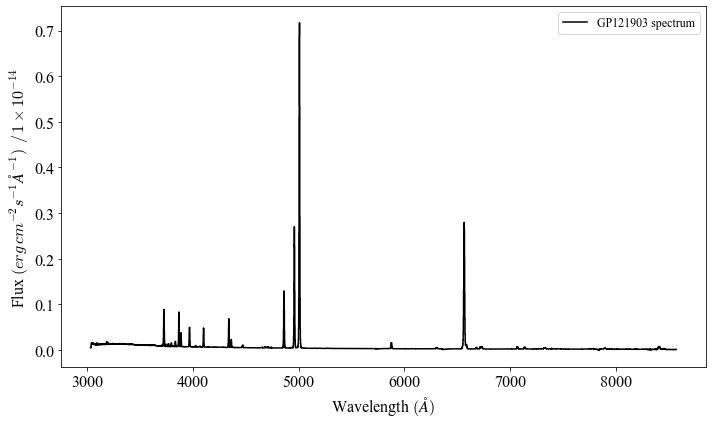

In [18]:
gp_spec.plot_spectrum(spec_label=f'GP121903 spectrum', frame='rest')